In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
%matplotlib inline

In [3]:
from pathlib import Path

root_dir = str(Path.cwd().parent.parent)

In [38]:
def plot_spectrum_3d(file_name, size=24, angle_up=30, angle_side=45):
    data = pd.read_csv(root_dir + "/data/music_spectrum/" + file_name, index_col=0, dtype=np.double)
    data.columns = pd.to_numeric(data.columns)
    data = data.loc[:,70:190]
    x = data.index.to_numpy()
    y = data.columns.to_numpy()
    z = data.values
    X, Y = np.meshgrid(x,y)
    Z = z.transpose()

    fig = plt.figure(figsize=(size, size))
    ax = plt.axes(projection='3d')
    ax.view_init(angle_up, angle_side)
    surf = ax.plot_surface(X, Y, Z, cmap='turbo', linewidth=0, rcount=150, ccount=300, alpha=1)
    ax.set_xlabel("azimuth")
    # ax.set_xticks(range(0, 361, 30))
    ax.set_ylabel("elevation")
    # ax.set_yticks(range(0, 361, 30))
    ax.set_zlabel("result")
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=30)
    plt.show()

In [39]:
def plot_spectrum_contour(file_name, size=15):
    data = pd.read_csv(root_dir + "/data/music_spectrum/" + file_name, index_col=0, dtype=np.double)
    data.columns = pd.to_numeric(data.columns)
    data = data.loc[:,:90]
    x = data.index.to_numpy()
    y = data.columns.to_numpy()
    z = data.values
    X, Y = np.meshgrid(x,y)
    Z = z.transpose()

    fig = plt.figure(figsize=(size, size))
    plot = plt.pcolormesh(x, y, Z, cmap='turbo')

    # contour needs the centers
    cset = plt.contour(X, Y, Z, cmap='gray')
    plt.clabel(cset)

    plt.colorbar(plot)
    plt.savefig('plot_z_flat.png')

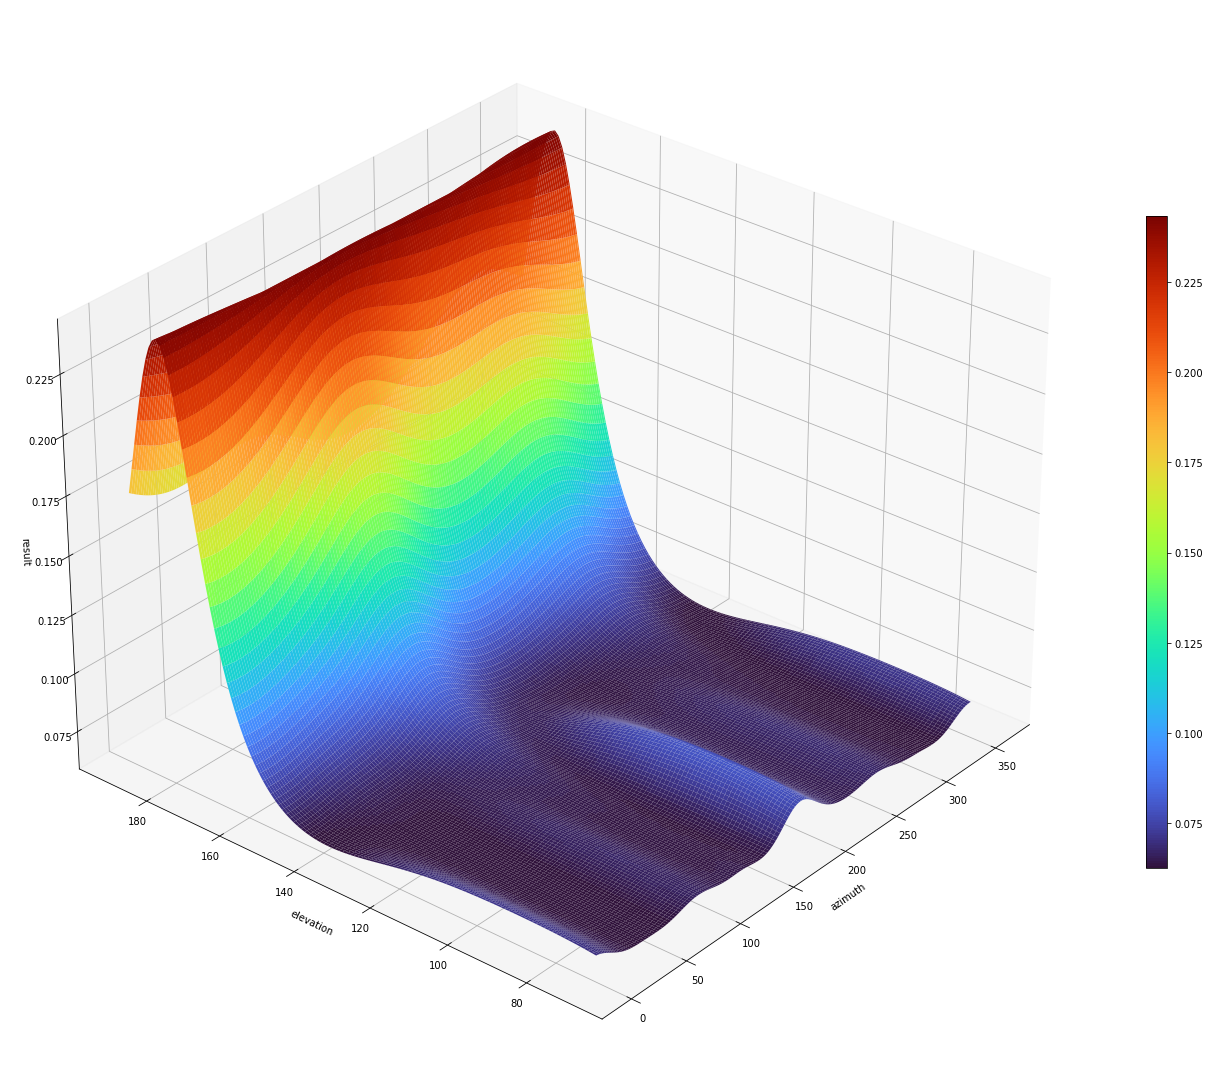

In [49]:
# plot_spectrum_contour("close_sample_0405.csv")
# plot_spectrum_3d("close_sample_0830.csv", angle_up=30, angle_side=-140)
# plot_spectrum_3d("close_sample_2025.csv", angle_up=30, angle_side=30)
plot_spectrum_3d("close_sample_8940.csv", angle_up=30, angle_side=-140)
# plot_spectrum("close_sample_0029.csv")
# plot_spectrum("close_sample_0300.csv")
# plot_spectrum("close_sample_0900.csv", angle_up=10, angle_side=0)
# plot_spectrum("close_sample_1500.csv")
# plot_spectrum("close_sample_2700.csv")